In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For geospatial visualization
from datetime import datetime

In [1]:
# Load dataset (Replace 'TrafficCrashes.csv' with the actual dataset filename)
df = pd.read_csv("TrafficCrashes.csv", low_memory=False)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

print("\nSample Data:")
print(df.head())

# Standardize column names (convert to lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handling Missing Values
df.dropna(subset=["crash_date", "latitude", "longitude"], inplace=True)  # Drop rows missing key data
df.fillna({"injuries_total": 0, "weather_condition": "Unknown"}, inplace=True)  # Fill missing values

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert crash_date to datetime format
df["crash_date"] = pd.to_datetime(df["crash_date"], errors="coerce")

# Extract additional date-related features
df["year"] = df["crash_date"].dt.year
df["month"] = df["crash_date"].dt.month
df["day"] = df["crash_date"].dt.day
df["hour"] = df["crash_date"].dt.hour

# Handle inconsistent values in categorical columns
df["weather_condition"] = df["weather_condition"].str.strip().str.capitalize()

# Save the cleaned dataset
df.to_csv("clean_chicago_traffic.csv", index=False)
print("\nData Cleaning Complete. Cleaned dataset saved as 'clean_chicago_traffic.csv'.")

# Load the cleaned dataset
df_clean = pd.read_csv("clean_chicago_traffic.csv")

NameError: name 'pd' is not defined

/tmp/ipykernel_25282/2919390390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["year"], palette="viridis")


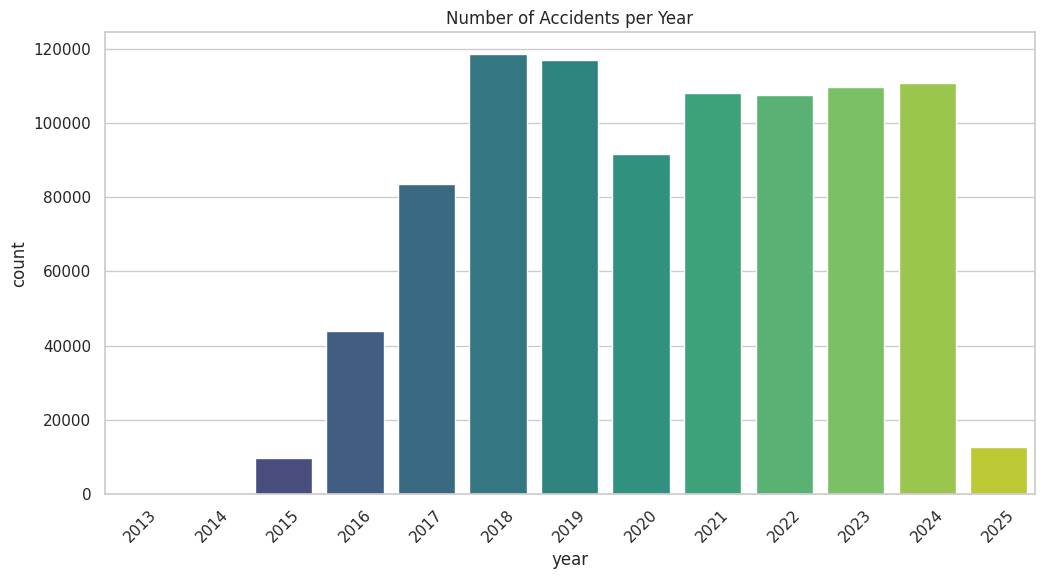

In [4]:
# Set style for seaborn
sns.set(style="whitegrid")

# 1. Number of Accidents per Year
plt.figure(figsize=(12,6))
sns.countplot(x=df_clean["year"], palette="viridis")
plt.title("Number of Accidents per Year")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_25282/1327178554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["month"], palette="coolwarm")


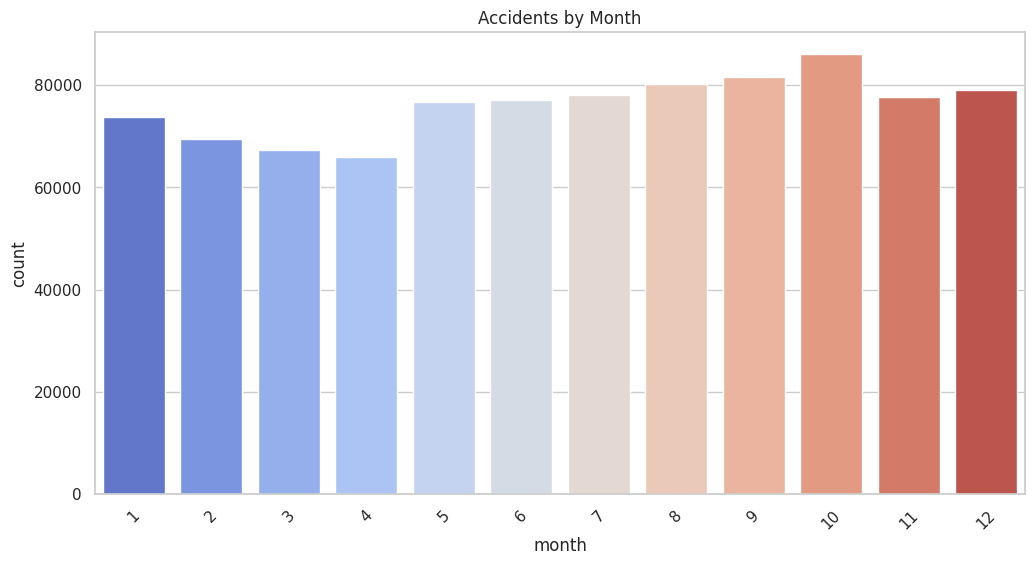

In [5]:
# 2. Accidents by Month
plt.figure(figsize=(12,6))
sns.countplot(x=df_clean["month"], palette="coolwarm")
plt.title("Accidents by Month")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_25282/4040561642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["hour"], palette="magma")


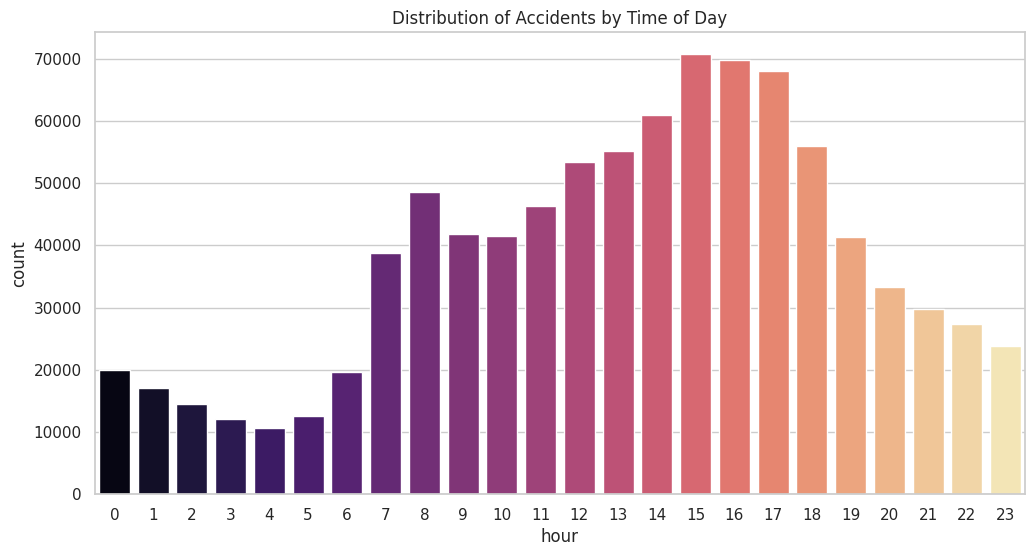

In [6]:
# 3. Distribution of Accidents by Time of Day
plt.figure(figsize=(12,6))
sns.countplot(x=df_clean["hour"], palette="magma")
plt.title("Distribution of Accidents by Time of Day")
plt.show()

/tmp/ipykernel_25282/2903529815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clean["weather_condition"].value_counts().index,


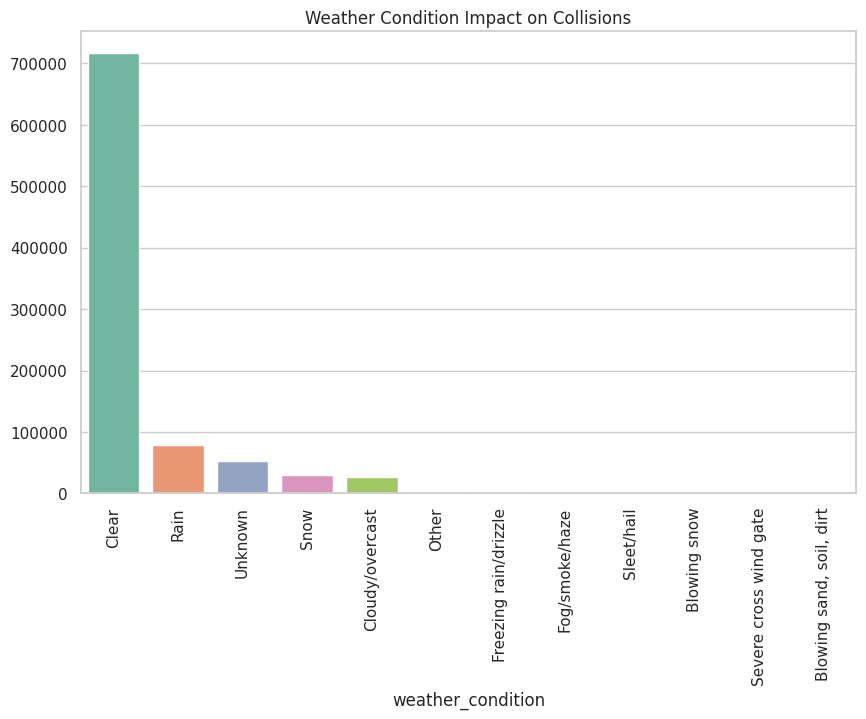

In [7]:

# 4. Weather Condition Impact on Collisions
plt.figure(figsize=(10,6))
sns.barplot(x=df_clean["weather_condition"].value_counts().index, 
            y=df_clean["weather_condition"].value_counts().values, 
            palette="Set2")
plt.xticks(rotation=90)
plt.title("Weather Condition Impact on Collisions")
plt.show()

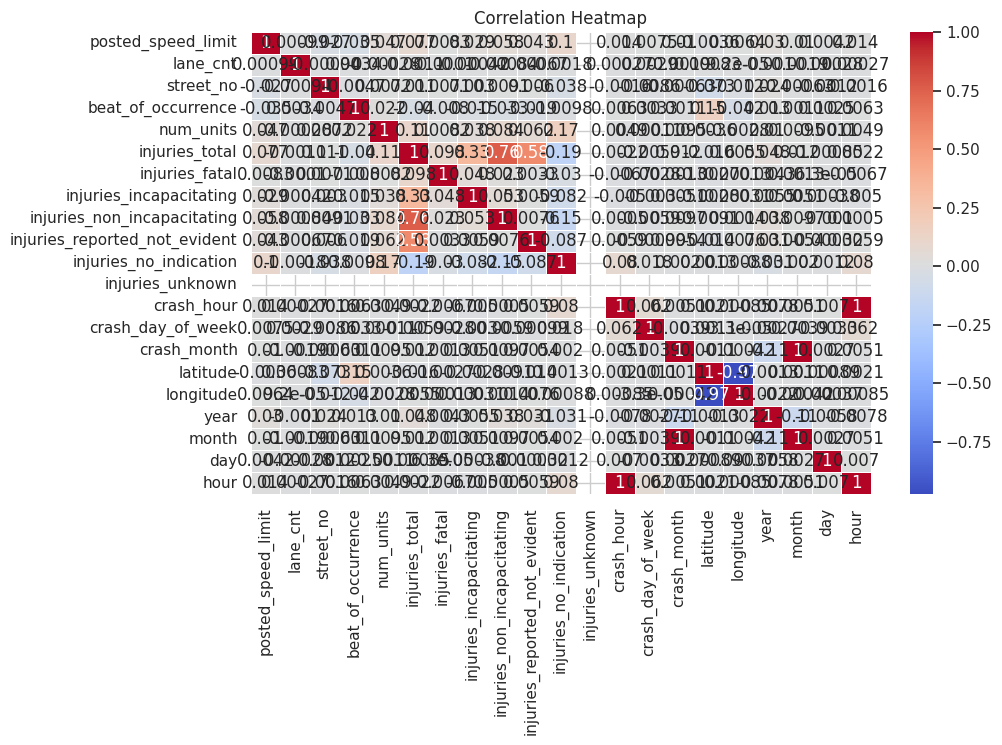

In [8]:
# 5. Correlation Heatmap of Numeric Variables (Fix applied)
plt.figure(figsize=(10, 6))
numeric_df = df_clean.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# 6. Accidents by Road Surface Conditions
if "road_surface_condition" in df_clean.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y=df_clean["road_surface_condition"], palette="muted")
    plt.title("Impact of Road Surface Conditions on Accidents")
    plt.show()
else:
    print("Column 'road_surface_condition' not found in the dataset!")

Column 'road_surface_condition' not found in the dataset!


/tmp/ipykernel_25282/4129556069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["lighting_condition"], palette="pastel")


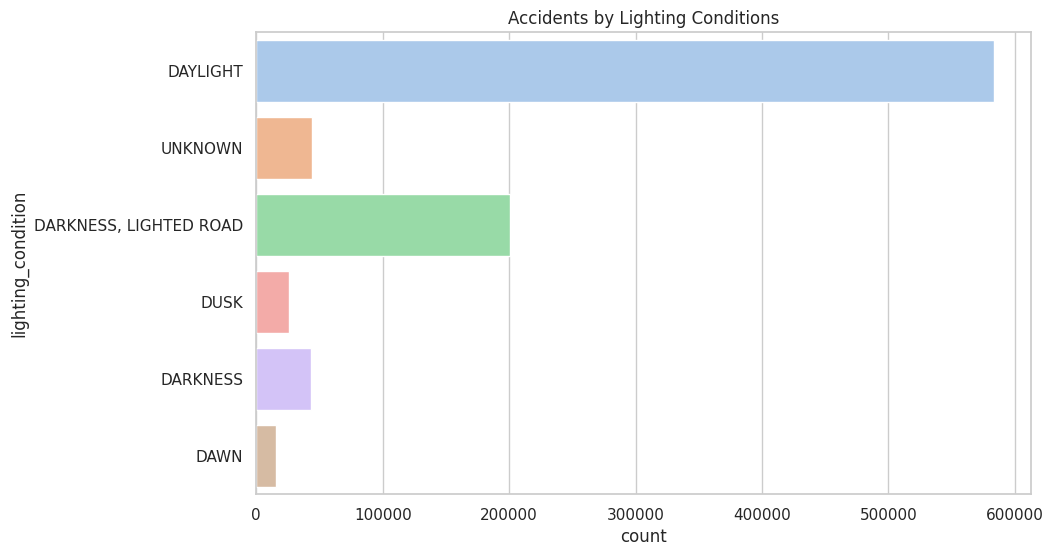

In [10]:
# 7. Accidents by Lighting Condition
plt.figure(figsize=(10,6))
sns.countplot(y=df_clean["lighting_condition"], palette="pastel")
plt.title("Accidents by Lighting Conditions")
plt.show()

/tmp/ipykernel_25282/271578752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["crash_type"], palette="cool")


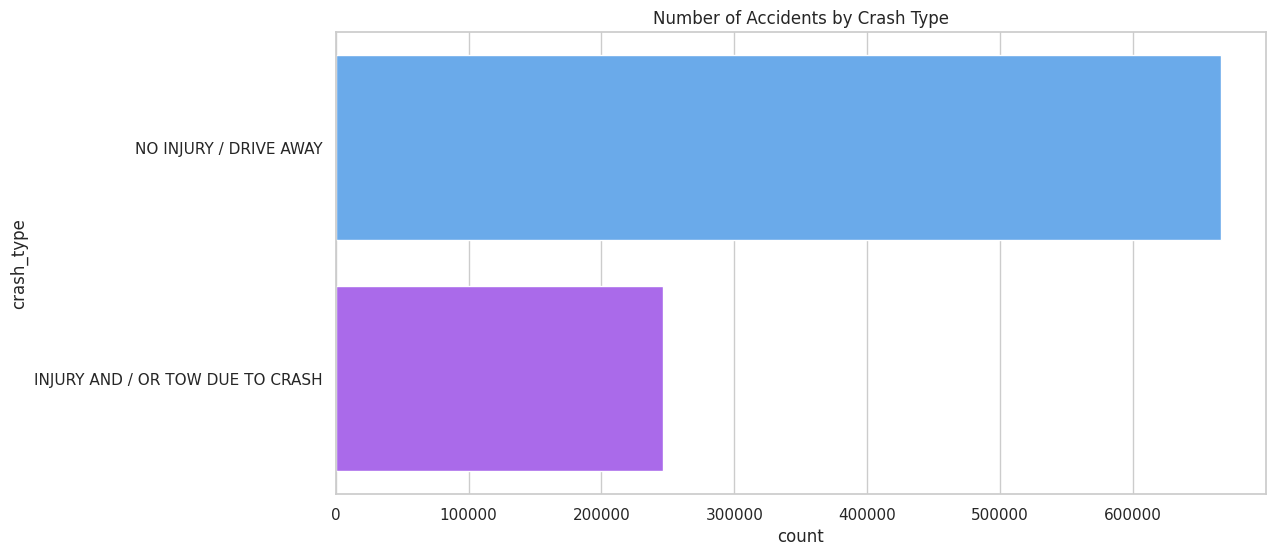

In [11]:
# 8. Number of Accidents by Crash Type
plt.figure(figsize=(12,6))
sns.countplot(y=df_clean["crash_type"], palette="cool")
plt.title("Number of Accidents by Crash Type")
plt.show()

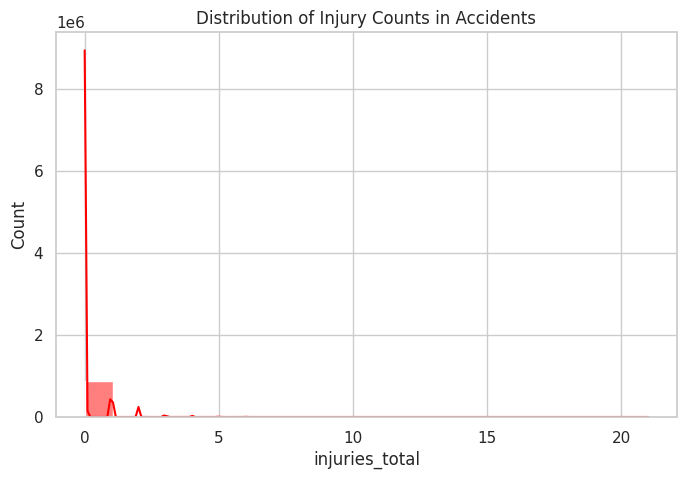

In [12]:
# 9. Number of Accidents Involving Injuries
plt.figure(figsize=(8,5))
sns.histplot(df_clean["injuries_total"], bins=20, kde=True, color="red")
plt.title("Distribution of Injury Counts in Accidents")
plt.show()

In [13]:
# 10. Geospatial Visualization using Folium
m = folium.Map(location=[df_clean["latitude"].mean(), df_clean["longitude"].mean()], zoom_start=10)
for index, row in df_clean.sample(500).iterrows():  # Sample 500 points for better visualization
    folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius=2, color="red").add_to(m)
m.save("traffic_map.html")
print("Analysis Complete. Check 'traffic_map.html' for geospatial visualization.")

Analysis Complete. Check 'traffic_map.html' for geospatial visualization.


In [14]:
df_clean.rename(columns={'crash_date': 'ACCIDENT_DATE'}, inplace=True)

In [16]:
# Convert ACCIDENT_DATE to datetime format
df_clean["ACCIDENT_DATE"] = pd.to_datetime(df_clean["ACCIDENT_DATE"], errors="coerce")

# Extract additional time features
df_clean["ACCIDENT_HOUR"] = df_clean["ACCIDENT_DATE"].dt.hour
df_clean["ACCIDENT_MONTH"] = df_clean["ACCIDENT_DATE"].dt.month

/tmp/ipykernel_25282/2269446388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["ACCIDENT_DATE"].dt.dayofweek, palette="husl")


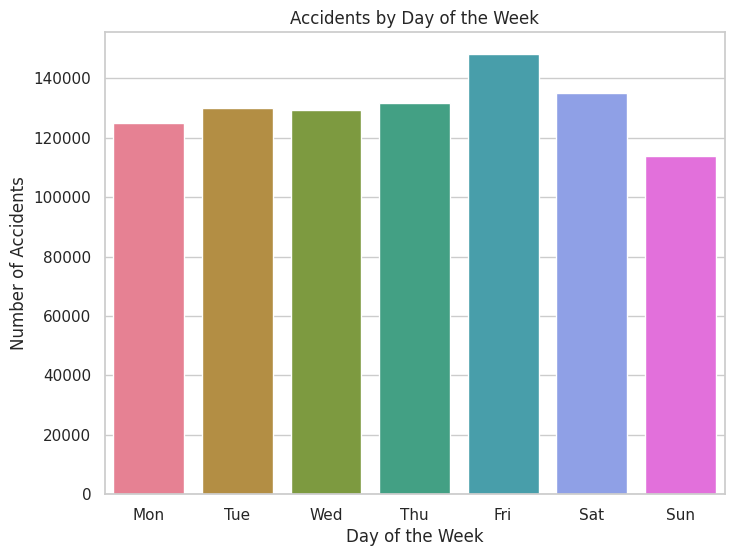

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["ACCIDENT_DATE"].dt.dayofweek, palette="husl")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

/tmp/ipykernel_25282/4158479169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["ACCIDENT_HOUR"], palette="coolwarm")


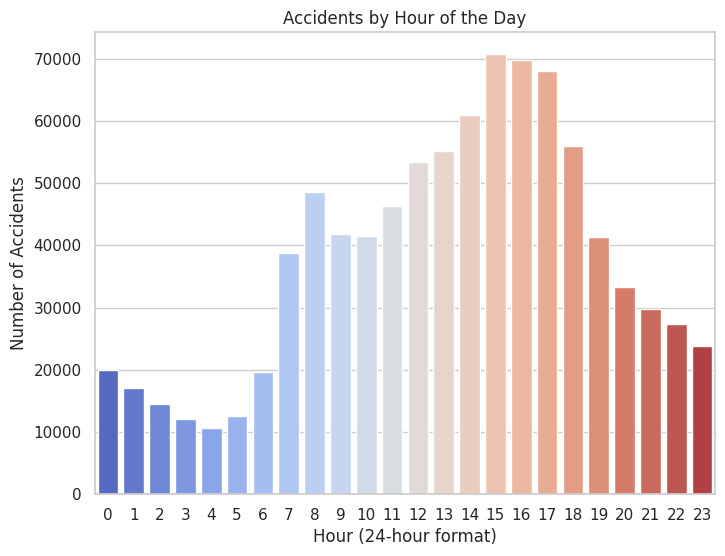

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["ACCIDENT_HOUR"], palette="coolwarm")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Accidents")
plt.show()


/tmp/ipykernel_25282/3429868563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["ACCIDENT_MONTH"], palette="viridis")


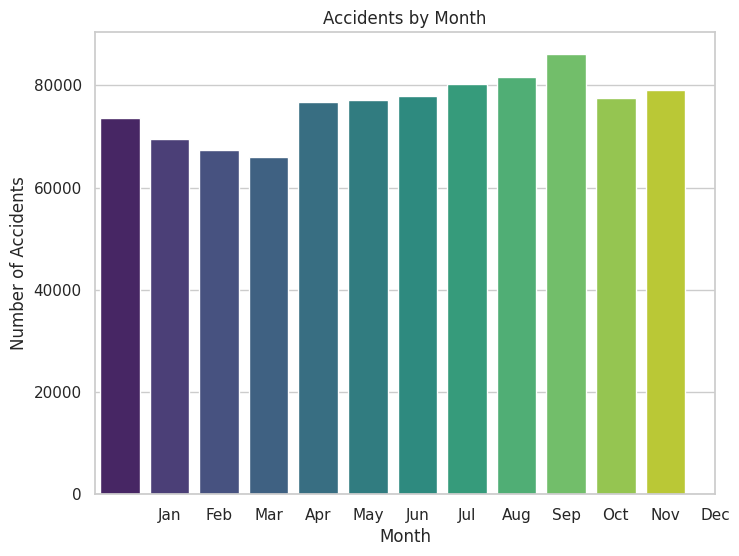

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["ACCIDENT_MONTH"], palette="viridis")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


/tmp/ipykernel_25282/1316212376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["weather_condition"], palette="muted", order=df_clean["weather_condition"].value_counts().index)


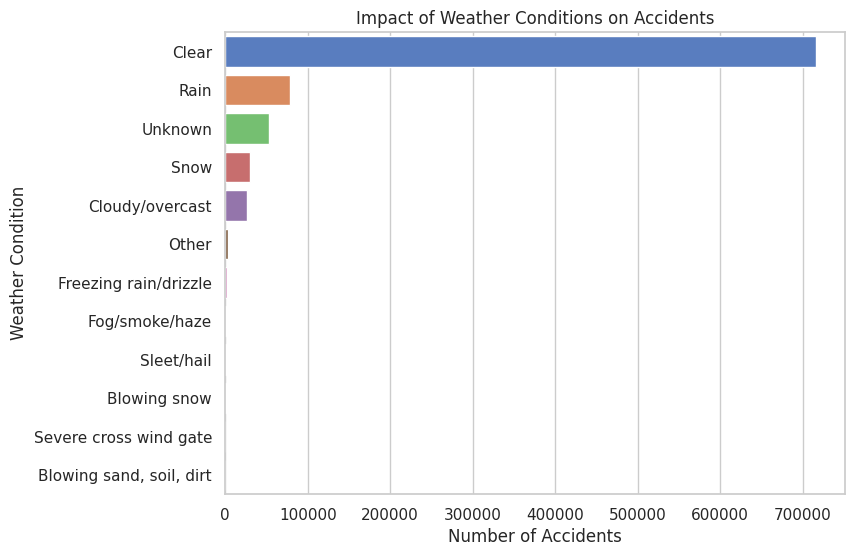

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_clean["weather_condition"], palette="muted", order=df_clean["weather_condition"].value_counts().index)
plt.title("Impact of Weather Conditions on Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


/tmp/ipykernel_25282/4074445871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["lighting_condition"], palette="coolwarm", order=df_clean["lighting_condition"].value_counts().index)


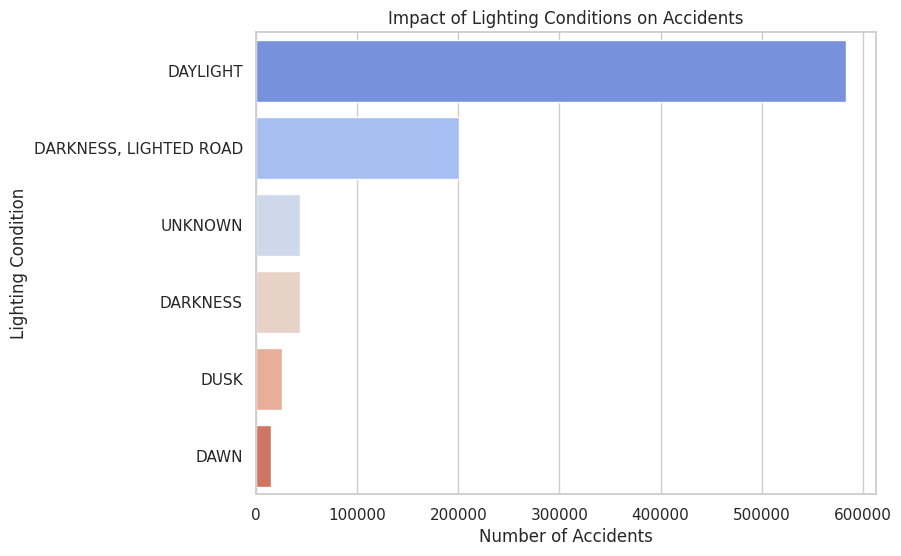

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_clean["lighting_condition"], palette="coolwarm", order=df_clean["lighting_condition"].value_counts().index)
plt.title("Impact of Lighting Conditions on Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Lighting Condition")
plt.show()


/tmp/ipykernel_25282/778214159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["roadway_surface_cond"], palette="magma", order=df_clean["roadway_surface_cond"].value_counts().index)


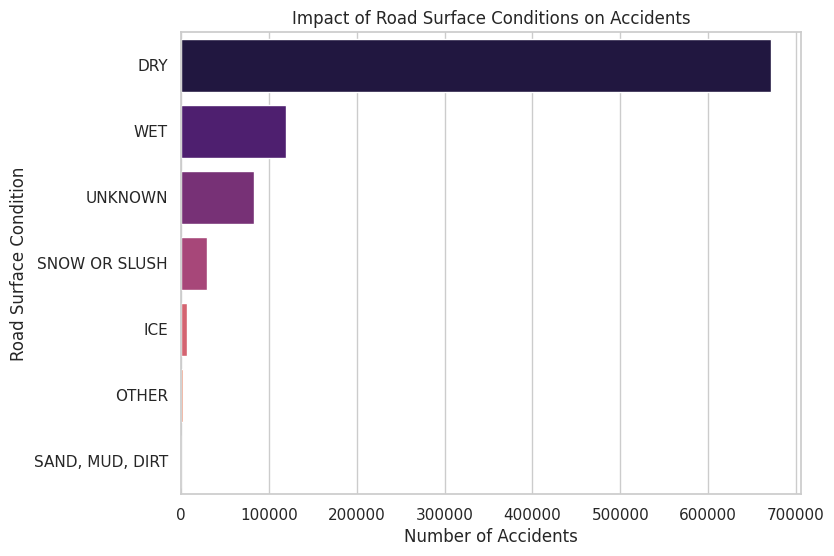

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_clean["roadway_surface_cond"], palette="magma", order=df_clean["roadway_surface_cond"].value_counts().index)
plt.title("Impact of Road Surface Conditions on Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface Condition")
plt.show()


/tmp/ipykernel_25282/810618294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["traffic_control_device"], palette="cool", order=df_clean["traffic_control_device"].value_counts().index)


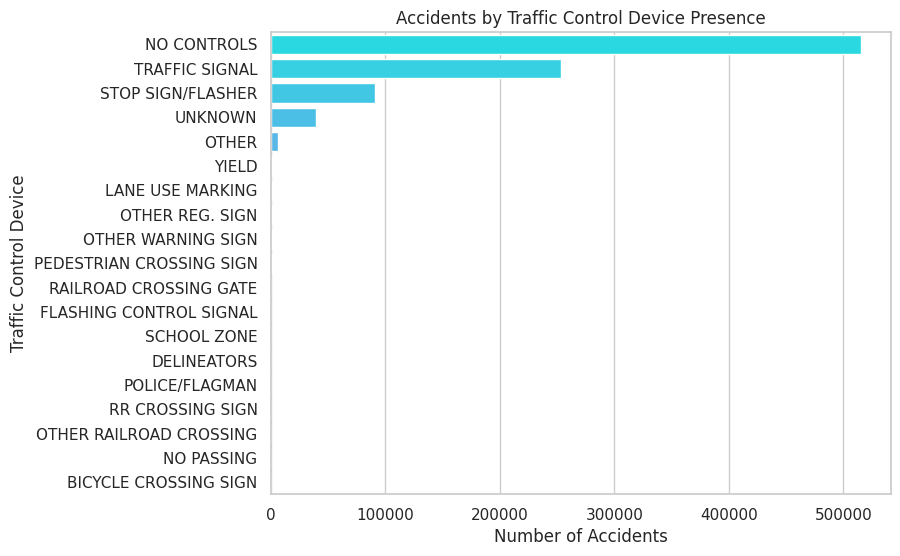

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_clean["traffic_control_device"], palette="cool", order=df_clean["traffic_control_device"].value_counts().index)
plt.title("Accidents by Traffic Control Device Presence")
plt.xlabel("Number of Accidents")
plt.ylabel("Traffic Control Device")
plt.show()


/tmp/ipykernel_25282/3223078749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["first_crash_type"], palette="viridis", order=df_clean["first_crash_type"].value_counts().index)


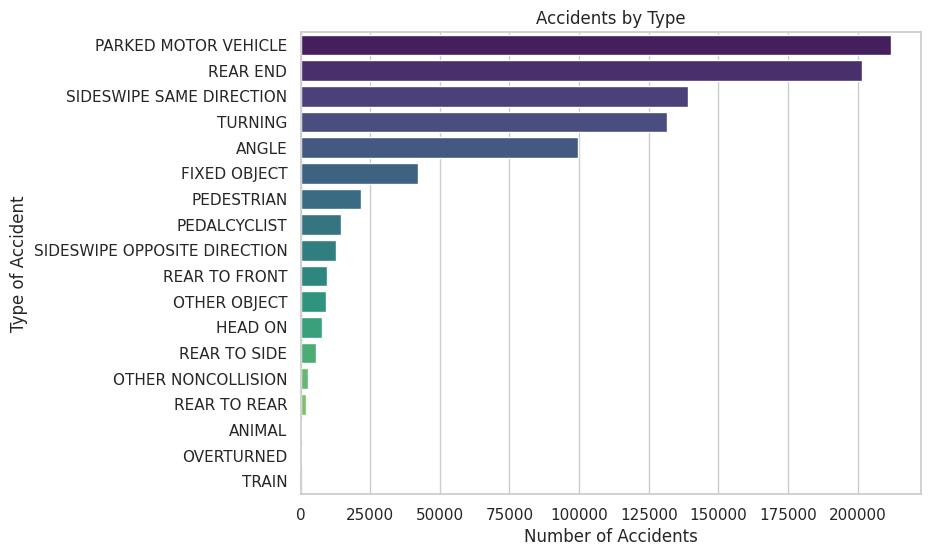

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_clean["first_crash_type"], palette="viridis", order=df_clean["first_crash_type"].value_counts().index)
plt.title("Accidents by Type")
plt.xlabel("Number of Accidents")
plt.ylabel("Type of Accident")
plt.show()

/tmp/ipykernel_25282/3586769274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["intersection_related_i"].fillna("No"), palette="coolwarm")


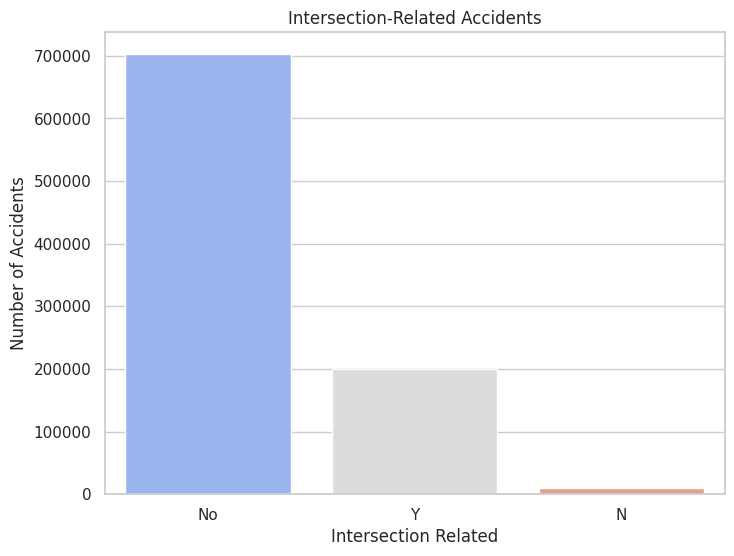

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["intersection_related_i"].fillna("No"), palette="coolwarm")
plt.title("Intersection-Related Accidents")
plt.xlabel("Intersection Related")
plt.ylabel("Number of Accidents")
plt.show()


/tmp/ipykernel_25282/1423452986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["hit_and_run_i"].fillna("No"), palette="muted")


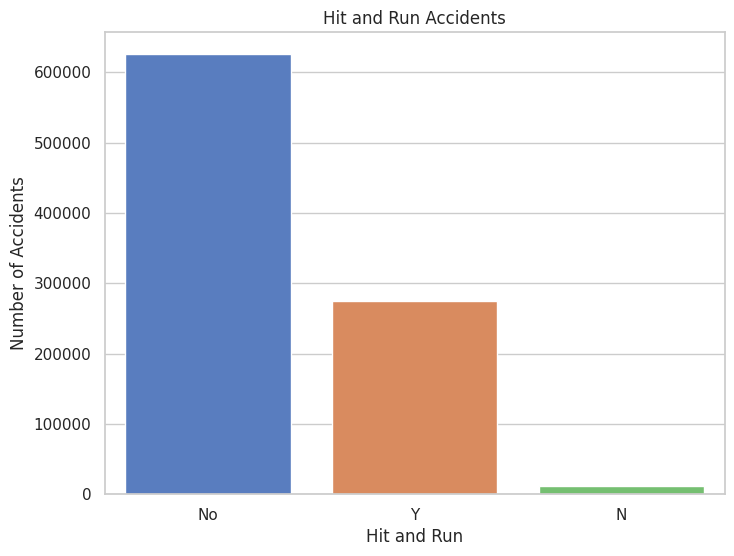

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["hit_and_run_i"].fillna("No"), palette="muted")
plt.title("Hit and Run Accidents")
plt.xlabel("Hit and Run")
plt.ylabel("Number of Accidents")
plt.show()


/tmp/ipykernel_25282/2440107243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["crash_type"], palette="Set2", order=df_clean["crash_type"].value_counts().index)


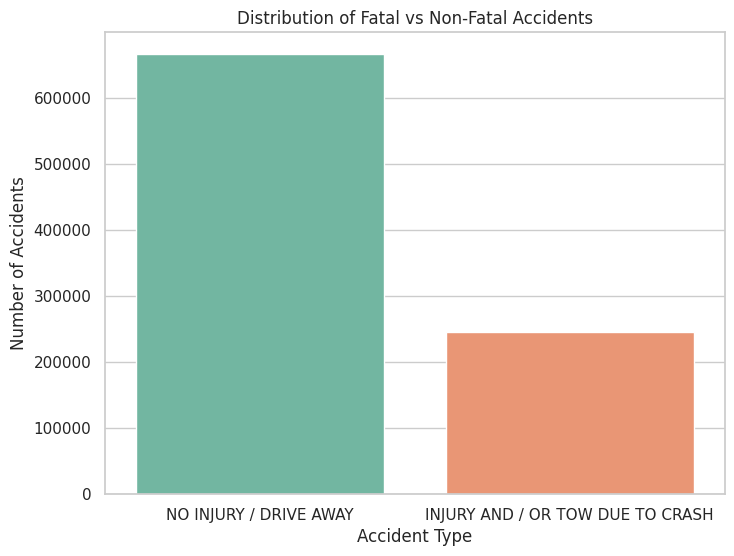

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_clean["crash_type"], palette="Set2", order=df_clean["crash_type"].value_counts().index)
plt.title("Distribution of Fatal vs Non-Fatal Accidents")
plt.xlabel("Accident Type")
plt.ylabel("Number of Accidents")
plt.show()